Bei der Hermite-Interpolation geben wir für einige Stützstellen nicht nur die Werte der Funktion, sondern auch die höherer Ableitungen vor. In den Übungen wurde dieses Problem explizit gelöst (siehe python-Notebook zu Blatt 1). Das resultierende Programm ist

In [1]:
!pip install --user sympy numpy matplotlib
import sympy, math, numpy as np, pylab, matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (20.0, 10.0)
from IPython.display import display
sympy.init_printing(use_latex='mathjax')
x=sympy.symbols("x")

In [2]:
def hermite(P):
    N=len(P)
    p=0
    for i in range(0,N):
        Q=1
        z=P[i][0]
        y=P[i][1]
        for k in range(0,N):
            if (i!=k):
                Q=Q*(x-P[k][0])**len(P[k][1])
        for k in range(0,len(y)):
            p=p+(y[k]-sympy.diff(p,x,k).subs('x',z))*((x-z)**k)*Q/Q.subs('x',z)/math.factorial(k)
    return p

zu einem Datenvektor $P$ der Form $P=[[x_0,[y_0,y_1,\ldots,y_n]],\ldots]$. Wir schauen uns einige Interpolationen am Runge-Beispiel an.

In [3]:
runge=1/(1+25*x*x)
display(runge)

    1    
─────────
    2    
25⋅x  + 1

Wir wissen schon, dass die äquidistante Interpolation keine guten Ergebnisse liefert.

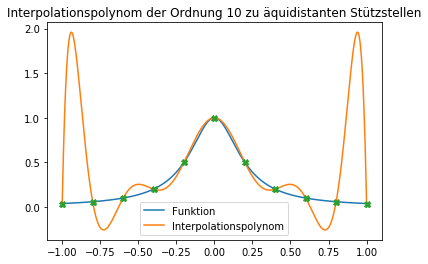

In [4]:
t=np.linspace(-1,1,11)
P=[[z,[runge.subs(x,z)]] for z in t]
y=[runge.subs(x,z) for z in t]
p=hermite(P)
p=p.expand()
X=np.linspace(-1,1,1024)
Y=[runge.subs(x,z) for z in X]
PY=[p.subs(x,z) for z in X]
plt.plot(X,Y,X,PY,t,y,'X')
plt.title('Interpolationspolynom der Ordnung 10 zu äquidistanten Stützstellen')
plt.legend(['Funktion','Interpolationspolynom']);

Wir verkleinern die Anzahl der Stützstellen und geben dafür auch die Werte der Ableitungen vor.

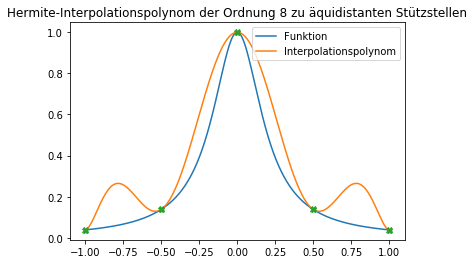

In [5]:
drunge=sympy.diff(runge,x)
t=np.linspace(-1,1,5)
dP=[[z,[runge.subs(x,z),drunge.subs(x,z)]] for z in t]
p=hermite(dP).expand()
PY=[p.subs(x,z) for z in X]
y=[runge.subs(x,z) for z in t]
plt.plot(X,Y,X,PY,t,y,'X')
plt.title('Hermite-Interpolationspolynom der Ordnung 8 zu äquidistanten Stützstellen')
plt.legend(['Funktion','Interpolationspolynom']);

Die Funktion bricht am Rand immer noch aus. Wir geben dort noch weitere Ableitungen vor.

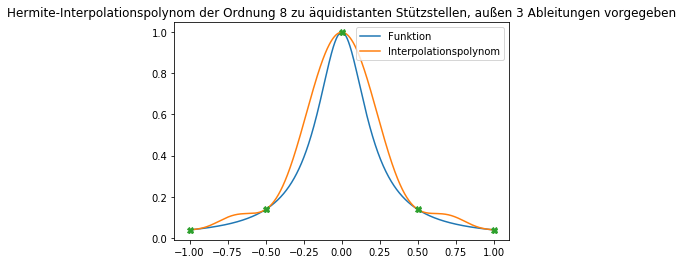

In [6]:
ddrunge=sympy.diff(drunge,x)
dddrunge=sympy.diff(ddrunge,x)
dP[0]=[-1,[runge.subs(x,-1),drunge.subs(x,-1),ddrunge.subs(x,-1),dddrunge.subs(x,-1)]]
dP[4]=[1,[runge.subs(x,1),drunge.subs(x,1),ddrunge.subs(x,1),dddrunge.subs(x,1)]]
p=hermite(dP).expand()
PY=[p.subs(x,z) for z in X]
y=[runge.subs(x,z) for z in t]
plt.plot(X,Y,X,PY,t,y,'X')
plt.title('Hermite-Interpolationspolynom der Ordnung 8 zu äquidistanten Stützstellen, außen 3 Ableitungen vorgegeben')
plt.legend(['Funktion','Interpolationspolynom']);

Fazit: Durch die Vorgabe höherer Ableitungen kann man das Interpolationspolynom auf die vorgegebene Kurve zwingen. Das Ganze ist aber sehr mühsam und erfordert schnell hohe Polynomgrade.